# Generate Simulated Data: Fixed-Plaintext-Unprotected

In [205]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [206]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -4
    jitterRight = 4
else:
    jitterLeft = None
    jitterRight = None

In [207]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [208]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,5.0,None,None


In [209]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [210]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))

print("plaintext:",plaintext[0:5])

plaintext: [85, 85, 85, 85, 85]


In [211]:
# Verify size of plaintext
len(plaintext)

100000

In [212]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [-0.20210548301657472, 5.308305446298364, -5.534679119662199, -4.942994352679968, -2.952135302415358] 
labels: [3, 3, 3, 3, 3]


In [213]:
# Verify size of leakedData 
len(leakedData)

100000

In [214]:
# Verify size of labels 
len(labels)

100000

In [215]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace at index 24 equal to t=25, index i matches with the leaked data
        if z == 24:
            rawData.append(leakedData[i])
        # Else create random sample
        else:   
            rawData.append(random.randint(0,8)+gauss(noiseStart, noiseEnd))
            #rawData.append(0+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [4.748824403317633, 1.0557649915584104, 14.714281982319388, 12.887082369596321, 15.110623872388949, 9.89923877456905, 7.577086966273695, 4.3135995338214705, 7.983295418605891, 3.9504225223275835, -4.479841472476969, -0.1722169479442055, -3.4857511608193708, 11.155089650278999, 3.8352552147555024, 9.377126171463075, -5.483570472820247, 7.151955840182083, 6.78404926442828, 7.538746211548536, 18.388257802492742, -2.4998259664539493, -0.18869486204211672, -1.8901152052233012, -0.20210548301657472, 7.608015846193612, 3.455535681620441, 14.463121861946718, -3.183522791968306, 14.1407825950038, -0.9043598327420685, 10.85893186984519, 1.3519921956195775, 2.52324828824495, 2.929136870003002, 3.9970212586074334, 5.529369913527838, 3.3107812661987577, 0.1882879570070235, 2.6667214097376863, 10.159691845324547, 11.42278229558649, -2.7272257821824697, 8.199788526293709, 2.4195980587580954, 7.266813619486616, -1.54903818765552, -1.9876337600582659, 9.218193366184968, 16.8913

In [216]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

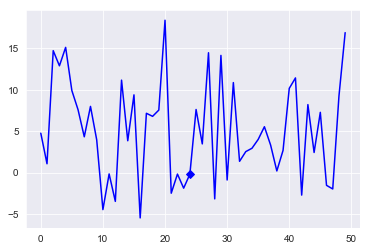

In [217]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[24])

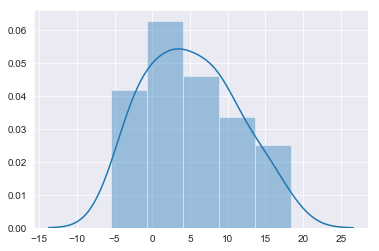

In [218]:
sns.distplot(rawTraces[0])

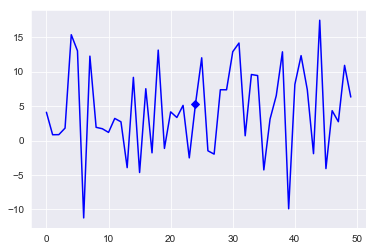

In [219]:
plt.plot(rawTraces[1],'-bD',markevery=[24])

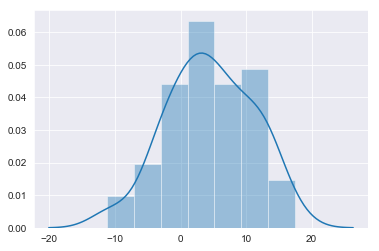

In [220]:
sns.distplot(rawTraces[1])

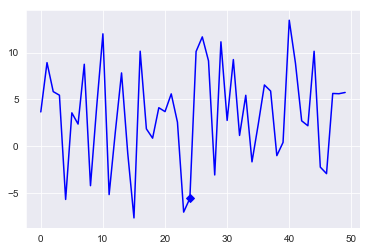

In [221]:
plt.plot(rawTraces[2],'-bD',markevery=[24])

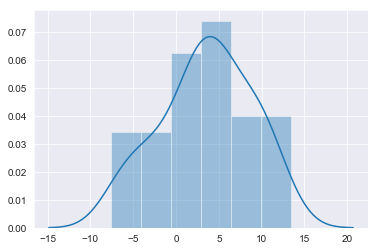

In [222]:
sns.distplot(rawTraces[2])

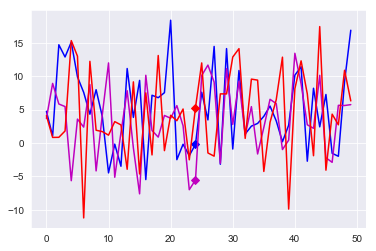

In [223]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[24])

### Data Path

In [224]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Test

In [225]:
class TestNotebook(unittest.TestCase):

    def test_Plaintext(self):
        self.assertEqual(plaintext[0], plaintext[1])
        self.assertEqual(plaintext[0], plaintext[len(plaintext)-1])
    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Plaintext (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.042s

OK


In [226]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
fixedKey = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,4.748824,1.055765,14.714282,12.887082,15.110624,9.899239,7.577087,4.313600,7.983295,3.950423,...,11.422782,-2.727226,8.199789,2.419598,7.266814,-1.549038,-1.987634,9.218193,16.891397,85
1,4.094319,0.834178,0.850604,1.796690,15.337914,13.003245,-11.224867,12.232412,1.909251,1.706561,...,12.303735,7.360064,-1.906470,17.437027,-4.073006,4.320870,2.724282,10.893693,6.302217,85
2,3.674072,8.925165,5.838884,5.456958,-5.649085,3.577269,2.380623,8.751573,-4.181833,4.252258,...,8.862254,2.724311,2.199702,10.135903,-2.206998,-2.900358,5.640395,5.614741,5.747399,85
3,2.534276,-1.169627,-7.684645,14.202237,-3.121385,4.867523,2.542510,-3.201195,-4.093690,-0.236870,...,-5.079300,15.400874,6.075328,-2.154184,-3.347925,-6.882136,-2.389319,1.705329,-5.429191,85
4,7.196238,16.097094,3.373868,3.462772,-3.715627,10.499527,12.038195,5.557648,-1.211236,10.003899,...,5.858414,-2.021658,15.662071,7.847262,8.431966,4.739082,-0.399186,3.626803,10.820191,85


In [227]:
fixedKey.head()

,0
0,85
1,85
2,85
3,85
4,85


### Write Data

In [228]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/FPFK.csv',index=False)
fixedKey.to_csv('./'+dataPath+'/FPKEY.csv',index=False)